In [5]:
import sys
sys.path.append('/home/loringm/proliferation-and-track')


from utils import convert_to_n5

import gunpowder as gp
import matplotlib.pyplot as plt
import numpy as np

import zarr

In [2]:
data_directory = '/home/loringm/Downloads/SIMULATED_DATASET/01'
new_zarr_path = '/home/loringm/Downloads/SIMULATED_DATASET/01/data.n5'

In [3]:
convert_to_n5(data_directory, outfile=new_zarr_path, key='raw', resolution=[1,1,1,1])

100%|█████████████████████████████████████████| 150/150 [00:34<00:00,  4.31it/s]
/home/loringm/.conda/envs/kitty/lib/python3.7/site-packages/zarr/n5.py:711: RuntimeWarning: Not all N5 implementations support blosc compression (yet). You might not be able to open the dataset with another N5 library.
  RuntimeWarning


In [37]:
gt_path = '/home/loringm/Downloads/SIMULATED_DATASET/01_GT/SEG'

convert_to_n5(gt_path, outfile=new_zarr_path, key='GT', resolution=[1,1,1,1])

100%|█████████████████████████████████████████| 150/150 [00:11<00:00, 13.60it/s]


In [38]:
test = zarr.open(new_zarr_path)

In [39]:
test.tree()

Tree(nodes=(Node(disabled=True, name='/', nodes=(Node(disabled=True, icon='table', name='GT (150, 59, 349, 639…

In [8]:
test['raw'].shape

(150, 59, 349, 639)

In [76]:
test['raw'][0].shape

(59, 349, 639)

In [67]:
len(test['raw'])

150

In [68]:
test

<zarr.hierarchy.Group '/'>

In [69]:
'raw' in test

True

In [70]:
new_zarr_path

'/home/loringm/Downloads/SIMULATED_DATASET/01/data.n5'

In [71]:
_raw = gp.ArrayKey('raw')
_ground_truth = gp.ArrayKey('GT')

raw_source = gp.ZarrSource(
    new_zarr_path,  # the zarr container
    {_raw: 'raw', }# which dataset to associate to the array key
    # {_raw: gp.ArraySpec(interpolatable=True, roi=gp.Roi(gp.Coordinate((0,0,0,0)), gp.Coordinate((150, 59, 349, 639)))),}
    # meta-information
)

gt_source = gp.ZarrSource(
    new_zarr_path,  # the zarr container
    {_ground_truth: 'GT', }# which dataset to associate to the array key
    # {_raw: gp.ArraySpec(interpolatable=True, roi=gp.Roi(gp.Coordinate((0,0,0,0)), gp.Coordinate((150, 59, 349, 639)))),}
    # meta-information
)

comb_source = ((raw_source, gt_source) + gp.MergeProvider())

_pipeline = comb_source


request = gp.BatchRequest()
request[_raw] = gp.Roi((0, 0, 0, 0), (1,1,100,100))
request[_ground_truth] = gp.Roi((0, 0, 0, 0), (1,1,100,100))


simple_augment = gp.SimpleAugment()
random_location = gp.RandomLocation()
_pipeline = _source + random_location + simple_augment


# build the pipeline...
with gp.build(_pipeline):

  # ...and request a batch
  batch = _pipeline.request_batch(request)
  print(batch[_ground_truth].data.shape)

(1, 1, 100, 100)


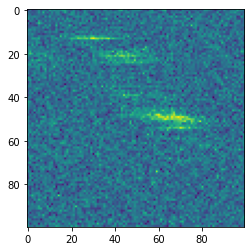

In [72]:
plt.imshow(batch[_raw].data[0,0,:,:])

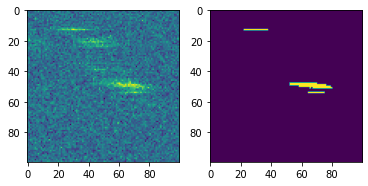

In [73]:
fig, ax = plt.subplots(1,2)

ax[0].imshow(batch[_raw].data[0,0,:,:])
ax[1].imshow(batch[_ground_truth].data[0,0,:,:])